## This workbook will be structured as follows:

### 1. Importing Libraries and Data
### 2. Cleaning the data
### 3. Prepping data for visualization
### 4. Exploring the data visually
### 5. Hypothesis
### 6. Reshaping Variables
### 7. Splitting the data into training and test sets
### 8. Regression analysis
### 9. Plotting the test set
### 10. Interpretation of how well the line fits the data
### 11. Checking model performance
### 12. Comparing predicted y values with actual values
### 13. Thoughts on the model 
### 14. Repeating steps 3-13 for Blocked Shots and Wins

# 1. Importing Libraries and Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Creating a path to the .csv file
path = r'C:\Users\mmoss\07-02-2022 NHL Data Analysis'

In [3]:
# Importing the cleaned data
df_relationships = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'data_relationships.csv'), index_col = False)

In [4]:
# Checking the head
df_relationships.head()

,Unnamed: 0,team_id,Assists,Goals,Shots,Hits,Blocked Shots,number_of_wins
0,0,1,662,404,4605,3305,2191,1691
1,1,2,825,495,5252,5204,3032,1743
2,2,3,771,456,4630,3731,2292,1768
3,3,4,865,506,5182,3798,2380,1735
4,4,5,854,504,5164,4496,2225,1786


# 2. Cleaning the data

### Cleaning the column headings

In [5]:
# Seeing the columns
df_relationships.columns

Index(['Unnamed: 0', 'team_id', 'Assists', 'Goals', 'Shots', 'Hits',
       'Blocked Shots', 'number_of_wins'],
      dtype='object')

In [6]:
# Removing the Unamed:0 Column
df_relationships = df_relationships.drop('Unnamed: 0', 1)

C:\Users\mmoss\AppData\Local\Temp/ipykernel_1808/1795198759.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_relationships = df_relationships.drop('Unnamed: 0', 1)


In [7]:
# Checking it
df_relationships.head()

,team_id,Assists,Goals,Shots,Hits,Blocked Shots,number_of_wins
0,1,662,404,4605,3305,2191,1691
1,2,825,495,5252,5204,3032,1743
2,3,771,456,4630,3731,2292,1768
3,4,865,506,5182,3798,2380,1735
4,5,854,504,5164,4496,2225,1786


Success!

In [8]:
# Getting the shape of the data
df_relationships.shape

(35, 7)

### Missing values

In [9]:
# Check for missing values

df_relationships.isnull().sum()



team_id           0
Assists           0
Goals             0
Shots             0
Hits              0
Blocked Shots     0
number_of_wins    0
dtype: int64

No missing values.

### Duplicates check

In [10]:
dups = df_relationships.duplicated()

In [11]:
dups.shape # No dups

(35,)

### Checking for extreme values

<AxesSubplot:xlabel='Goals', ylabel='Count'>

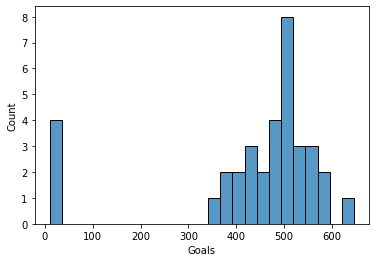

In [12]:
sns.histplot(df_relationships['Goals'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

Seems unlikely that there would be on a handful of goals for an entire team but removing these 4 entries would get rid of 11% of my data I'm going to keep them in. 

In [14]:
df_relationships['Goals'].mean() # Check the mean

435.8285714285714

In [15]:
df_relationships['Goals'].median() # Check the median

491.0

In [16]:
df_relationships['Goals'].max() # Check the max

647

# 3. Prepping data for visualization

## A) Shots and Goals

# 4. Exploring data visually

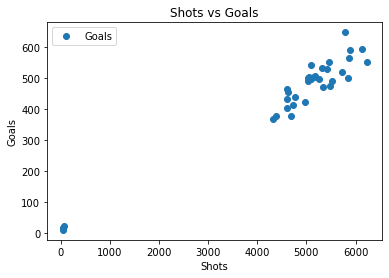

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_relationships.plot(x = 'Shots', y='Goals',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Shots vs Goals')  
plt.xlabel('Shots')  
plt.ylabel('Goals')  
plt.show()

# 5. Hypothesis

As a players shots per game increase, so do their goals.

# 6. Reshaping variables

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_relationships['Shots'].values.reshape(-1,1)
y = df_relationships['Goals'].values.reshape(-1,1)

In [20]:
X

array([[4605],
       [5252],
       [4630],
       [5182],
       [5164],
       [6134],
       [4718],
       [5476],
       [4603],
       [5451],
       [5730],
       [5033],
       [5792],
       [5087],
       [5099],
       [4317],
       [5345],
       [5865],
       [5313],
       [5877],
       [4599],
       [5037],
       [4377],
       [5841],
       [4682],
       [5413],
       [5515],
       [4766],
       [5044],
       [4974],
       [6231],
       [  53],
       [  64],
       [  40],
       [  48]], dtype=int64)

In [21]:
y

array([[404],
       [495],
       [456],
       [506],
       [504],
       [592],
       [414],
       [474],
       [432],
       [550],
       [518],
       [498],
       [647],
       [543],
       [496],
       [366],
       [470],
       [564],
       [533],
       [589],
       [463],
       [491],
       [378],
       [499],
       [376],
       [527],
       [490],
       [438],
       [504],
       [421],
       [552],
       [ 17],
       [ 22],
       [ 10],
       [ 15]], dtype=int64)

# 7. Splitting the data into training and test sets

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 8. Regression Analysis

In [23]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

# 9. Creating a plot that shows regression line on the test set

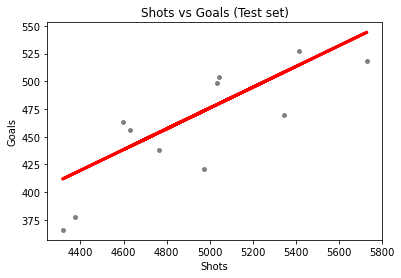

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Shots vs Goals (Test set)')
plot_test.xlabel('Shots')
plot_test.ylabel('Goals')
plot_test.show()

# 10. Interpretation of how well the line fits the data

Line fits the data fairly well.

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

# 11. Checking model performance

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.09362473]]
Mean squared error:  975.8103926159511
R2 score:  0.6283645014776589


According to the slope, as the number of shots rise so does the number of goals.

According to the MSE, the value is larger and it is not the best fit for the data.

According to the R2 Score, this is is a correlation coefficient of 0.81 a shows a strong positive relationship between the two variables. There is a relationship here!

# 12. Comparing predicted y values with actual y values

In [29]:
y_predicted

array([[473.40092205],
       [438.29164643],
       [508.13569872],
       [479.95465349],
       [417.50695527],
       [411.88947117],
       [544.18122168],
       [441.19401322],
       [478.92478141],
       [453.92697717],
       [514.50218069]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,421,473.400922
1,463,438.291646
2,470,508.135699
3,504,479.954653
4,378,417.506955
5,366,411.889471
6,518,544.181222
7,456,441.194013
8,498,478.924781
9,438,453.926977


Values are within tenths of a decimal here.

# 13. Thoughts about how the model performed

According to the slope of the model, as the number of shots rise so does the number of goals (it is positive).

According to the MSE, the value is larger and it is not the best fit for the data.

According to the R2 Score, this is is a correlation coefficient of 0.81 a shows a strong positive relationship between the two variables. There is a relationship here!

According to the actual y values and predicted y values they fall within decimal points of eachother. Pretty good predictor. 

# B) Blocked Shots and Wins

# Prepping data for visualization

## Extreme values

<AxesSubplot:xlabel='Blocked Shots', ylabel='Count'>

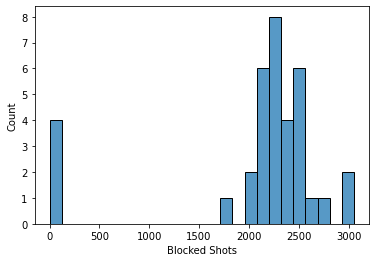

In [31]:
# Checking for extreme values
sns.histplot(df_relationships['Blocked Shots'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

Doesn't appear to be any extreme values here.

In [32]:
df_relationships['Blocked Shots'].mean() # Check the mean

2087.7428571428572

In [33]:
df_relationships['Blocked Shots'].median() # Check the median

2278.0

In [34]:
df_relationships['Blocked Shots'].max() # Check the max

3056

# Exploring data visually

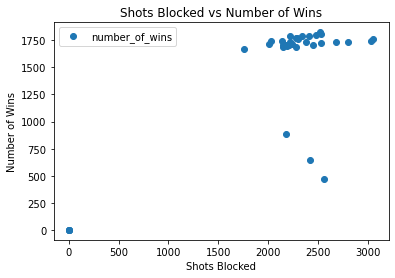

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_relationships.plot(x = 'Blocked Shots', y='number_of_wins',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Shots Blocked vs Number of Wins')  
plt.xlabel('Shots Blocked')  
plt.ylabel('Number of Wins')  
plt.show()

# Hypothesis

When a team blocks more shots, the number of games they win increases.

# Reshaping variables

In [36]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_2 = df_relationships['Blocked Shots'].values.reshape(-1,1)
y_2 = df_relationships['number_of_wins'].values.reshape(-1,1)

In [37]:
X_2

array([[2191],
       [3032],
       [2292],
       [2380],
       [2225],
       [2518],
       [1762],
       [2224],
       [2451],
       [2185],
       [2149],
       [2155],
       [2528],
       [2415],
       [2278],
       [2008],
       [2296],
       [2480],
       [2212],
       [2798],
       [2284],
       [2682],
       [2139],
       [3056],
       [2031],
       [2344],
       [2533],
       [2244],
       [2185],
       [2424],
       [2559],
       [   2],
       [   3],
       [   3],
       [   3]], dtype=int64)

In [38]:
y_2

array([[1691],
       [1743],
       [1768],
       [1735],
       [1786],
       [1822],
       [1669],
       [1732],
       [1709],
       [1709],
       [1705],
       [1682],
       [1804],
       [1789],
       [1771],
       [1713],
       [1762],
       [1794],
       [1709],
       [1731],
       [1686],
       [1736],
       [1739],
       [1761],
       [1744],
       [1787],
       [1721],
       [1714],
       [ 888],
       [ 650],
       [ 468],
       [   6],
       [   6],
       [   4],
       [   4]], dtype=int64)

# Splitting the data into training and test sets

In [39]:
# Split data into a training set and a test set.

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

# Regression Analysis

In [40]:
# Create a regression object.

regression_2 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [41]:
# Fit the regression object onto the training set.

regression_2.fit(X_train_2, y_train_2)

LinearRegression()

In [42]:
# Predict the values of y using X.

y_predicted_2 = regression_2.predict(X_test_2)

# Creating a plot that shows regression line on the test set

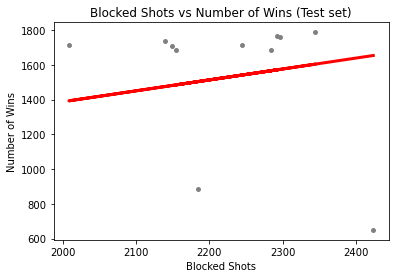

In [43]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Blocked Shots vs Number of Wins (Test set)')
plot_test.xlabel('Blocked Shots')
plot_test.ylabel('Number of Wins')
plot_test.show()

# Interpretation of how well the line fits the data

Data appears to fit the data less well than the last variable.

In [44]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test_2, y_predicted_2) # This is the mean squared error
r2 = r2_score(y_test_2, y_predicted_2) # This is the R2 score. 

# Checking model performance

In [45]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.6269228]]
Mean squared error:  163666.6098265995
R2 score:  -0.16463370505835973


Acccording to the slope, as blocked shots increase so does the number of wins.

According to the mean squared error, there is quite a bit of distance from the trend line and the points. Therefore this is not a good fit for this data.

According to R2, this value is negative so it is a bad fit.

# Comparing predicted y values with actual y values

In [46]:
y_predicted_2

array([[1653.25549722],
       [1565.48630547],
       [1573.00937905],
       [1503.42094844],
       [1474.58249972],
       [1392.45561314],
       [1480.8517277 ],
       [1570.50168785],
       [1484.61326449],
       [1540.40939354],
       [1603.10167336]])

In [47]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,650,1653.255497
1,1686,1565.486305
2,1762,1573.009379
3,888,1503.420948
4,1739,1474.582500
5,1713,1392.455613
6,1705,1480.851728
7,1768,1570.501688
8,1682,1484.613264
9,1714,1540.409394


These values are not very close. Blocked shots do not appear to be a good predictor of number of wins. 

# Thoughts about how the model performed

Acccording to the slope, as blocked shots increase so does the number of wins.

According to the mean squared error, there is quite a bit of distance from the trend line and the points. Therefore this is not a good fit for this data.

According to R2, this value is negative so it is a bad fit.

Doesn't appear to be any data bias here